### Chapter 03. 기온 데이터를 다양하게 시각화하기

#### ✅ 히스토그램 (Histogram) --> hist
    빈도수를 막대그래프 형태로 시각화해주는 그래프

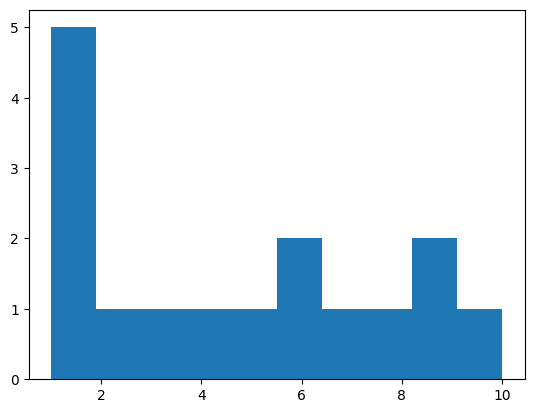

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist([1,1,1,1,1,2,3,4,5,6,6,7,8,9,9,10])

plt.show()

> 주사위를 던지는 행위를 반복해서, 주사위의 눈이 나오는 횟수를 시각화해보기

    bins : 히스토그램에서 막대기를 의미한다. 히스토그램의 막대기 개수를 정할 수 있는 매개변수
#### ✅ for문에서 i 대신 _를 사용하는 이유
    i 라는 변수를 정하게 되면 컴퓨터는 메모리를 할당한다. 반복만 중요하고 변수가 필요없을 때 _를 사용하면 가독성도 늘리고 깔끔한 코드가 된다.

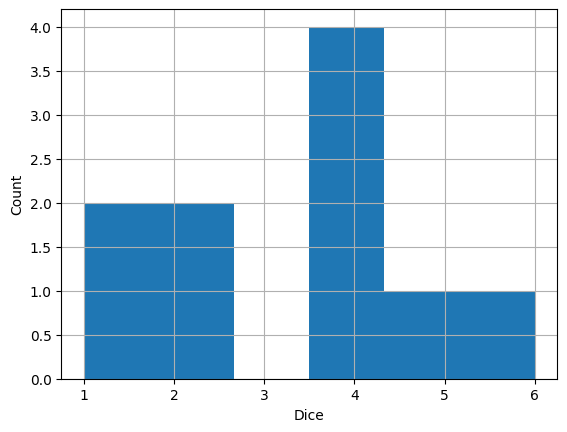

In [11]:
import random

dice = []

for _ in range(0, 10, 1): # 10번 주사위를 던진다는 의미
    dice.append(random.randint(1,6))

# 데이터 시각화하기
plt.figure()
plt.hist(dice, bins=6) # 막대기의 수 = 6
plt.grid(True)
plt.xlabel('Dice')
plt.ylabel('Count')
plt.show()

 #### ✅ 큰 수의 법칙 (Law of Larger Number, LLN)
    시행횟수를 많이 늘리게 되면 경험적 확률과 수학적 확률이 같아진다는 의미이다.
    - 경험적 확률: 시행에 따라서 계산되는 확률 (직접 시행)
    - 수학적 확률: 1/6
    
    

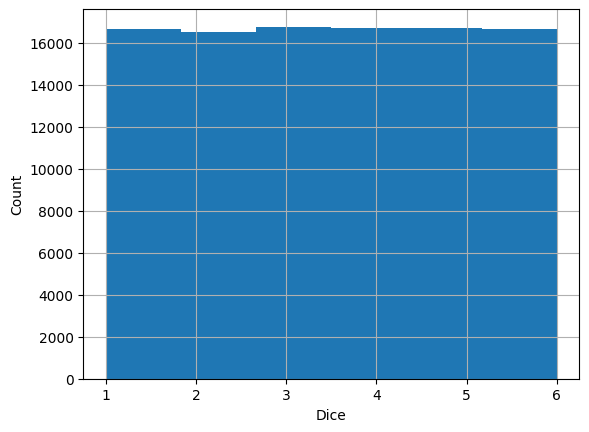

In [8]:
import random

LLN_dice = []

for _ in range(100000):
    LLN_dice.append(random.randint(1,6))

# 데이터 시각화하기
plt.figure()
plt.hist(LLN_dice, bins=6)
plt.xlabel('Dice')
plt.ylabel('Count')
plt.grid(True)
plt.show()

> 기후 데이터 히스토그램으로 시각화하기

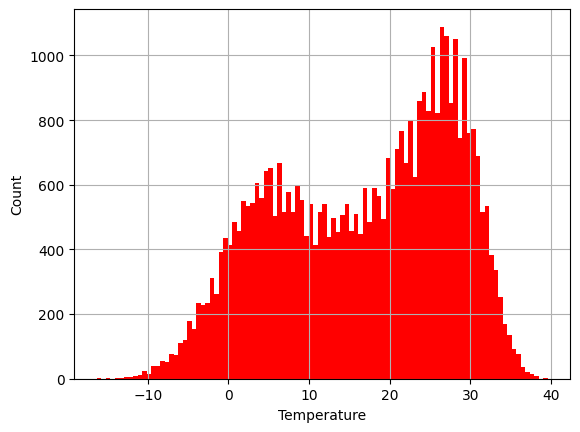

In [11]:
import csv
f = open('seoul.csv', 'r', encoding='cp949')
data = csv.reader(f)

header = next(data)

result = []
for row in data:
    # row[4]는 '최고 온도' 열임
    if row[4] != '':
        result.append(float(row[4])) # str -> float    # row[-1]도 가능
    #print(row[4])

f.close()

# 데이터 시각화하기
plt.figure()
plt.hist(result, bins=100, color='red')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.grid(True)
plt.show()
    

    히스토그램을 통해 10을 기준으로 왼쪽 부분은 겨울에 가까워지고 오른쪽은 여름에 가까워잔다고 파악할 수 있음

> 월별로 기온 데이터를 히스토그램으로 시각화하기

In [22]:
print(header)
print(row[0])
print(row[4])

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
	2024-02-08
6.2


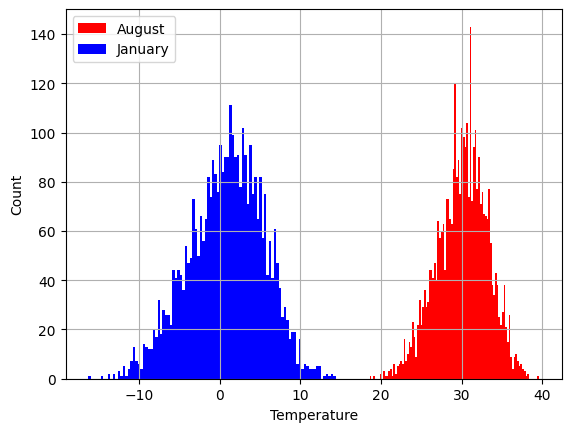

In [23]:
import csv
f = open('seoul.csv', 'r', encoding='cp949')
data = csv.reader(f)

header = next(data)

august= [] # 8월
january= [] # 1월

for row in data:
    if row[4] != '': 
        if row[0].split('-')[1] == '08':
            august.append(float(row[4])) # str -> float  
        elif row[0].split('-')[1] == '01':
            january.append(float(row[4]))

f.close()

# 데이터 시각화하기
plt.figure()

plt.hist(august, bins=100, color='red', label='August') # 8월의 히스토그램 
plt.hist(january, bins=100, color='blue', label='January') # 1월의 히스토그램

plt.xlabel('Temperature')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()

    1월의 최고기온은 주로 0도에 빈도가 많고 (겨울), 8월의 최고기온은 30도가 빈도가 많음을 알 수 있다 (여름).

> boxplot 그리기

[38, 38, 128, 156, 206, 214, 350, 435, 561, 911]


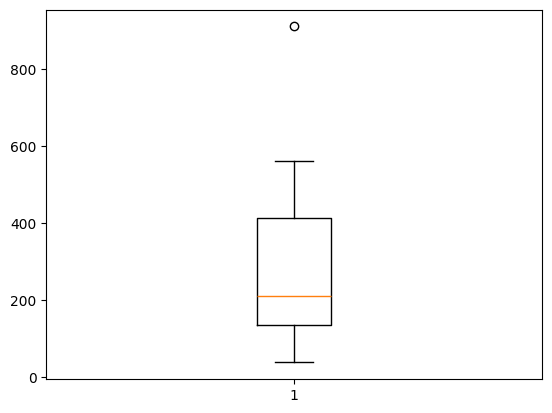

In [46]:
result = []

for _ in range(0, 10, 1):
    result.append(random.randint(1,1000))

print(sorted(result)) # 순서 오름차순으로 정렬하기


plt.figure()
plt.boxplot(result)
plt.show()

> 1월과 8월의 최고온도 데이터 boxplot으로 시각화하기

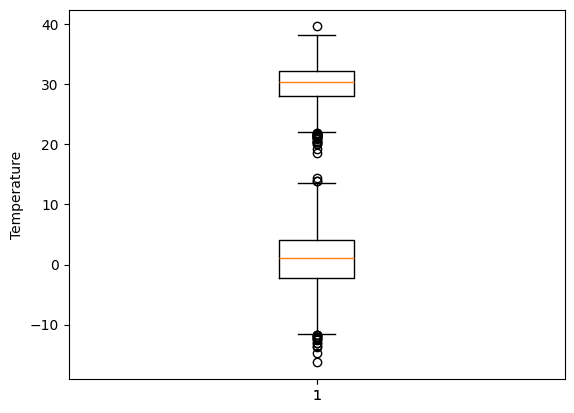

In [32]:
import csv
f = open('seoul.csv', 'r', encoding='cp949')
data = csv.reader(f)

header = next(data)

jan = []
aug = []

for row in data:
    if row[4] != '':
        if row[0].split('-')[1] == '01':
            jan.append(float(row[4]))
        if row[0].split('-')[1] == '08':
            aug.append(float(row[4]))
f.close()

plt.figure()
plt.boxplot(jan)
plt.boxplot(aug)
plt.ylabel('Temperature')
plt.show()

    한 라인에 두 개의 월이 나타나니 시각적으로 좋지 않음

> 1년치 최고기온 데이터 boxplot으로 시각화하기

In [45]:
print(row[0])

	2024-02-08


#### ✅ showfliers
    이상치(outlier)를 표시할지 여부를 정하는 매개변수
    - 기본값은 True로 이상치 표현

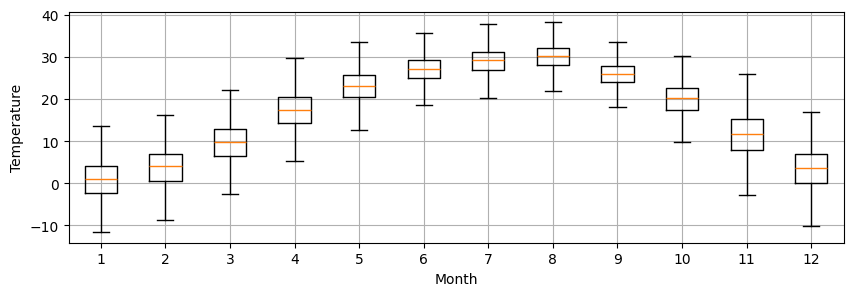

In [39]:
import csv
f = open('seoul.csv', 'r', encoding='cp949')
data = csv.reader(f)

header = next(data)
       # 1월,2월....
month = [[],[],[],[],[],[],[],[],[],[],[],[]] # 12개의 빈 리스트 저장

for row in data:
    if row[4] != '':
        month[int(row[0].split('-')[1])-1].append(float(row[4])) 
        # 1월의 경우 month 리스트 0번에 추가해야하므로 -1을 해준다.

f.close()

# 데이터 시각화
plt.figure(figsize=[10,3])
plt.boxplot(month, showfliers=False) # 이상치 제거
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

> 3월의 모든 날짜의 최고기온 boxplot으로 시각화하기

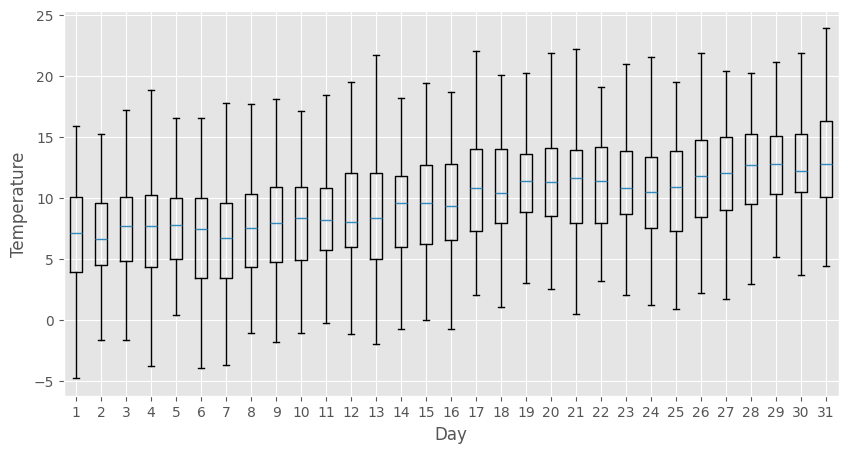

In [48]:
import csv
f = open('seoul.csv', 'r', encoding='cp949')
data = csv.reader(f)

header = next(data)
       
day = []
for _ in range(0, 31, 1): # 3월 기준
    day.append([])

for row in data:
    if row[4] != '':
        if row[0].split('-')[1] == '03':
            day[int(row[0].split('-')[2]) -1].append(float(row[4]))

f.close()

# 데이터 시각화
plt.style.use('ggplot') # plt.style.use('ggplot') --> 시각화 테마 변경, R 프로그래밍에서 사용

plt.figure(figsize=(10, 5)) # 가로 10인치 , 세로 5인치
plt.boxplot(day, showfliers=False) # 이상치 제거
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()